## Titanic Survivor Analysis

##### 1 - Import Library

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 2 - Load Titanic Train csv data

In [2]:
data = pd.read_csv("data/train.csv")

#### 3 - Explore Data

In [3]:
len(data)

891

In [4]:
data.shape

(891, 12)

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
data['Age'].min()  ,data['Age'].max()

(0.42, 80.0)

In [16]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
( data['Survived'].value_counts() * 100 ) / len(data)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [18]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## 4 - Visualizing Data

<AxesSubplot:>

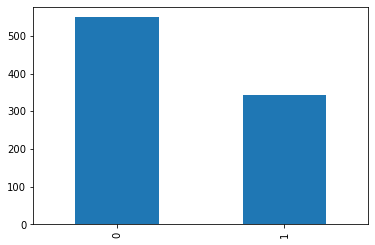

In [22]:
alpha_color = 0.5
data['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

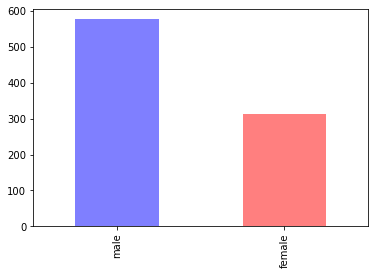

In [24]:
data['Sex'].value_counts().plot(kind='bar',color=['b','r'],alpha=alpha_color)

<AxesSubplot:>

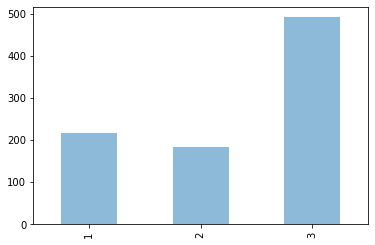

In [30]:
data['Pclass'].value_counts().sort_index().plot(kind='bar',alpha=alpha_color)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

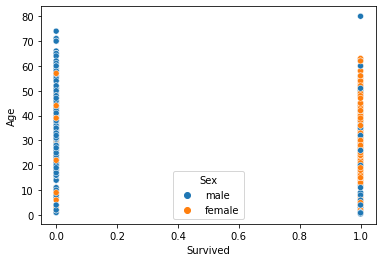

In [32]:
sns.scatterplot(x='Survived',y='Age',data=data,hue='Sex')

<AxesSubplot:>

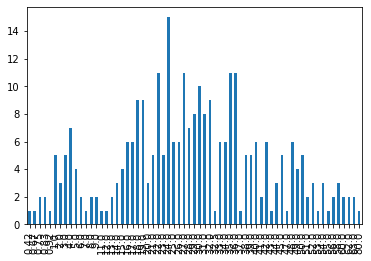

In [43]:
data[data['Survived']==1]['Age'].value_counts().sort_index().plot(kind='bar')

In [53]:
bins = np.arange(0,90,10)
data['Agebin'] = pd.cut(data['Age'],bins)

In [54]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"


<AxesSubplot:>

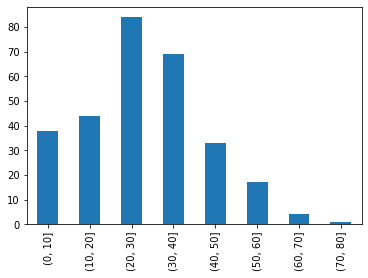

In [57]:
data[data['Survived'] == 1]['Agebin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

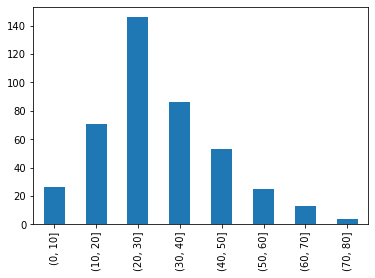

In [58]:
data[data['Survived'] == 0]['Agebin'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

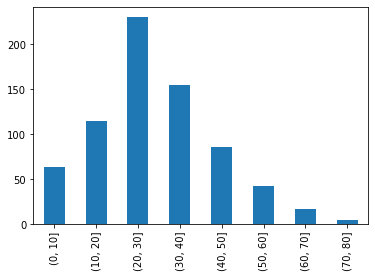

In [60]:
data['Agebin'].value_counts().sort_index().plot(kind='bar')

In [61]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agebin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,"(20, 30]"


<AxesSubplot:>

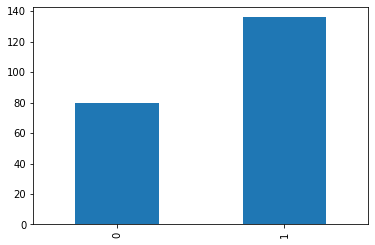

In [63]:
data[data['Pclass'] == 1]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

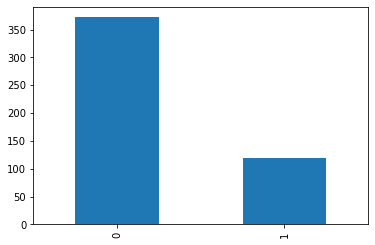

In [64]:
data[data['Pclass'] == 3]['Survived'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:>

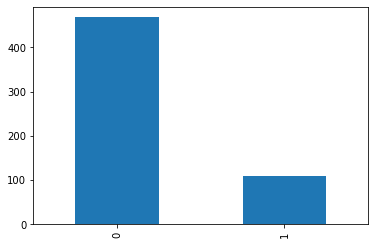

In [65]:
data[data['Sex'] == 'male']['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

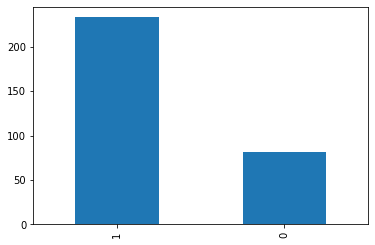

In [67]:
data[data['Sex'] == 'female']['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

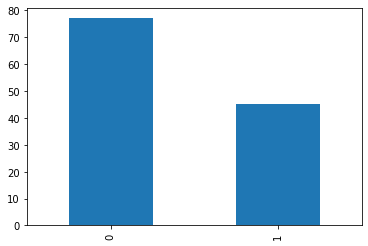

In [68]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

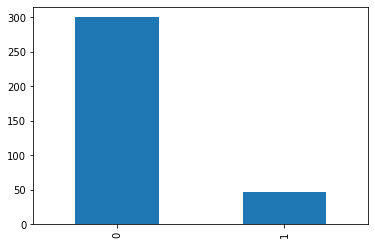

In [70]:
data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

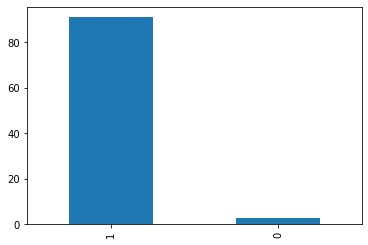

In [72]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

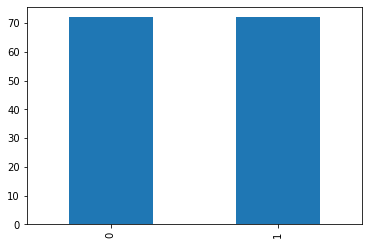

In [73]:
data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Survived'].value_counts().plot(kind='bar')